In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [2]:
#Testing for CVD, using max reduced csv file
heart_cvd = pd.read_csv('max_reduce.csv')
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
# Clean to columns needed
heart_cvd = heart_cvd[['SEX','AGE','CIGPDAY','HEARTRTE','SYSBP','BPMEDS','TOTCHOL','BMI','GLUCOSE','DIABETES','EDUC','CVD']]
heart_cvd.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,BPMEDS,TOTCHOL,BMI,GLUCOSE,DIABETES,EDUC,CVD
0,1,39,0.0,80.0,106.0,0.0,195.0,26.97,77.0,0,4.0,1
1,2,46,0.0,95.0,121.0,0.0,250.0,28.73,76.0,0,2.0,0
2,2,52,0.0,80.0,105.0,0.0,260.0,29.43,86.0,0,2.0,0
3,2,58,0.0,80.0,108.0,0.0,237.0,28.50,71.0,0,2.0,0
4,1,48,20.0,75.0,127.5,0.0,245.0,25.34,70.0,0,1.0,0


In [3]:
#Encode SEX column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
heart_cvd['SEX'] = label_encoder.fit_transform(heart_cvd['SEX'])

In [4]:
#Get dummies for educ col, drop first
heart_cvd = pd.get_dummies(heart_cvd,columns=['EDUC'],drop_first=True)
heart_cvd.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,BPMEDS,TOTCHOL,BMI,GLUCOSE,DIABETES,CVD,EDUC_2.0,EDUC_3.0,EDUC_4.0
0,0,39,0.0,80.0,106.0,0.0,195.0,26.97,77.0,0,1,0,0,1
1,1,46,0.0,95.0,121.0,0.0,250.0,28.73,76.0,0,0,1,0,0
2,1,52,0.0,80.0,105.0,0.0,260.0,29.43,86.0,0,0,1,0,0
3,1,58,0.0,80.0,108.0,0.0,237.0,28.50,71.0,0,0,1,0,0
4,0,48,20.0,75.0,127.5,0.0,245.0,25.34,70.0,0,0,0,0,0


In [5]:
#Set up for CVD to test
X = heart_cvd.drop("CVD", axis=1)
y = heart_cvd["CVD"]
print(X.shape, y.shape)

(9310, 13) (9310,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create Deep Learning Models

In [7]:
#First learning model with dense layers
from keras.models import Sequential
from keras.layers import Dense

dense_model = Sequential()
dense_model.add(Dense(units=11, activation='relu', input_dim=13))
dense_model.add(Dense(units=9, activation='relu'))
dense_model.add(Dense(units=7, activation='relu'))
dense_model.add(Dense(units=5, activation='relu'))
dense_model.add(Dense(units=3, activation='relu'))
dense_model.add(Dense(units=1, activation='sigmoid'))

from keras.metrics import categorical_accuracy
dense_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
dense = dense_model.fit(
    X_train_scaled,
    y_train,
    epochs=500,
    shuffle=True,
    verbose=2
)

Using TensorFlow backend.


Epoch 1/500
 - 1s - loss: 0.6214 - acc: 0.7130
Epoch 2/500
 - 0s - loss: 0.5206 - acc: 0.7481
Epoch 3/500
 - 0s - loss: 0.5069 - acc: 0.7469
Epoch 4/500
 - 0s - loss: 0.5020 - acc: 0.7509
Epoch 5/500
 - 0s - loss: 0.4997 - acc: 0.7526
Epoch 6/500
 - 0s - loss: 0.4977 - acc: 0.7562
Epoch 7/500
 - 0s - loss: 0.4962 - acc: 0.7559
Epoch 8/500
 - 0s - loss: 0.4945 - acc: 0.7554
Epoch 9/500
 - 0s - loss: 0.4934 - acc: 0.7579
Epoch 10/500
 - 0s - loss: 0.4922 - acc: 0.7610
Epoch 11/500
 - 0s - loss: 0.4910 - acc: 0.7624
Epoch 12/500
 - 0s - loss: 0.4901 - acc: 0.7598
Epoch 13/500
 - 0s - loss: 0.4897 - acc: 0.7602
Epoch 14/500
 - 0s - loss: 0.4885 - acc: 0.7618
Epoch 15/500
 - 0s - loss: 0.4878 - acc: 0.7627
Epoch 16/500
 - 0s - loss: 0.4874 - acc: 0.7614
Epoch 17/500
 - 0s - loss: 0.4865 - acc: 0.7657
Epoch 18/500
 - 0s - loss: 0.4855 - acc: 0.7624
Epoch 19/500
 - 0s - loss: 0.4849 - acc: 0.7622
Epoch 20/500
 - 0s - loss: 0.4845 - acc: 0.7634
Epoch 21/500
 - 0s - loss: 0.4841 - acc: 0.7648
E

Epoch 171/500
 - 0s - loss: 0.4541 - acc: 0.7912
Epoch 172/500
 - 0s - loss: 0.4539 - acc: 0.7918
Epoch 173/500
 - 0s - loss: 0.4537 - acc: 0.7912
Epoch 174/500
 - 0s - loss: 0.4545 - acc: 0.7892
Epoch 175/500
 - 0s - loss: 0.4548 - acc: 0.7905
Epoch 176/500
 - 0s - loss: 0.4531 - acc: 0.7907
Epoch 177/500
 - 0s - loss: 0.4540 - acc: 0.7920
Epoch 178/500
 - 0s - loss: 0.4540 - acc: 0.7907
Epoch 179/500
 - 0s - loss: 0.4530 - acc: 0.7935
Epoch 180/500
 - 0s - loss: 0.4533 - acc: 0.7910
Epoch 181/500
 - 0s - loss: 0.4541 - acc: 0.7922
Epoch 182/500
 - 0s - loss: 0.4536 - acc: 0.7938
Epoch 183/500
 - 0s - loss: 0.4532 - acc: 0.7906
Epoch 184/500
 - 0s - loss: 0.4529 - acc: 0.7912
Epoch 185/500
 - 0s - loss: 0.4522 - acc: 0.7923
Epoch 186/500
 - 0s - loss: 0.4521 - acc: 0.7938
Epoch 187/500
 - 0s - loss: 0.4524 - acc: 0.7920
Epoch 188/500
 - 0s - loss: 0.4526 - acc: 0.7913
Epoch 189/500
 - 0s - loss: 0.4526 - acc: 0.7935
Epoch 190/500
 - 0s - loss: 0.4527 - acc: 0.7905
Epoch 191/500
 - 0s 

 - 0s - loss: 0.4455 - acc: 0.7996
Epoch 339/500
 - 0s - loss: 0.4461 - acc: 0.7973
Epoch 340/500
 - 0s - loss: 0.4453 - acc: 0.7979
Epoch 341/500
 - 0s - loss: 0.4464 - acc: 0.7983
Epoch 342/500
 - 0s - loss: 0.4455 - acc: 0.7989
Epoch 343/500
 - 0s - loss: 0.4458 - acc: 0.8006
Epoch 344/500
 - 0s - loss: 0.4462 - acc: 0.7983
Epoch 345/500
 - 0s - loss: 0.4474 - acc: 0.7975
Epoch 346/500
 - 0s - loss: 0.4450 - acc: 0.7985
Epoch 347/500
 - 0s - loss: 0.4453 - acc: 0.7970
Epoch 348/500
 - 0s - loss: 0.4453 - acc: 0.7950
Epoch 349/500
 - 0s - loss: 0.4458 - acc: 0.7996
Epoch 350/500
 - 0s - loss: 0.4464 - acc: 0.7986
Epoch 351/500
 - 0s - loss: 0.4461 - acc: 0.7995
Epoch 352/500
 - 0s - loss: 0.4449 - acc: 0.7975
Epoch 353/500
 - 0s - loss: 0.4446 - acc: 0.8011
Epoch 354/500
 - 0s - loss: 0.4448 - acc: 0.7992
Epoch 355/500
 - 0s - loss: 0.4451 - acc: 0.7988
Epoch 356/500
 - 0s - loss: 0.4445 - acc: 0.7968
Epoch 357/500
 - 0s - loss: 0.4443 - acc: 0.8003
Epoch 358/500
 - 0s - loss: 0.4451

In [8]:
#Second learning model with light layers
from keras.models import Sequential
from keras.layers import Dense

light_model = Sequential()
light_model.add(Dense(units=7, activation='relu', input_dim=13))
light_model.add(Dense(units=3, activation='relu'))
light_model.add(Dense(units=1, activation='sigmoid'))

from keras.metrics import categorical_accuracy
light_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
light = light_model.fit(
    X_train_scaled,
    y_train,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
 - 1s - loss: 0.7268 - acc: 0.5268
Epoch 2/500
 - 0s - loss: 0.6368 - acc: 0.7502
Epoch 3/500
 - 0s - loss: 0.6089 - acc: 0.7501
Epoch 4/500
 - 0s - loss: 0.5896 - acc: 0.7506
Epoch 5/500
 - 0s - loss: 0.5757 - acc: 0.7534
Epoch 6/500
 - 0s - loss: 0.5655 - acc: 0.7549
Epoch 7/500
 - 0s - loss: 0.5583 - acc: 0.7544
Epoch 8/500
 - 0s - loss: 0.5514 - acc: 0.7565
Epoch 9/500
 - 0s - loss: 0.5419 - acc: 0.7574
Epoch 10/500
 - 0s - loss: 0.5332 - acc: 0.7572
Epoch 11/500
 - 0s - loss: 0.5266 - acc: 0.7597
Epoch 12/500
 - 0s - loss: 0.5219 - acc: 0.7588
Epoch 13/500
 - 0s - loss: 0.5177 - acc: 0.7595
Epoch 14/500
 - 0s - loss: 0.5146 - acc: 0.7605
Epoch 15/500
 - 0s - loss: 0.5118 - acc: 0.7605
Epoch 16/500
 - 0s - loss: 0.5097 - acc: 0.7615
Epoch 17/500
 - 0s - loss: 0.5077 - acc: 0.7598
Epoch 18/500
 - 0s - loss: 0.5061 - acc: 0.7620
Epoch 19/500
 - 0s - loss: 0.5048 - acc: 0.7602
Epoch 20/500
 - 0s - loss: 0.5037 - acc: 0.7605
Epoch 21/500
 - 0s - loss: 0.5027 - acc: 0.7584
E

Epoch 171/500
 - 0s - loss: 0.4840 - acc: 0.7650
Epoch 172/500
 - 0s - loss: 0.4838 - acc: 0.7648
Epoch 173/500
 - 0s - loss: 0.4838 - acc: 0.7654
Epoch 174/500
 - 0s - loss: 0.4838 - acc: 0.7657
Epoch 175/500
 - 0s - loss: 0.4840 - acc: 0.7647
Epoch 176/500
 - 0s - loss: 0.4835 - acc: 0.7651
Epoch 177/500
 - 0s - loss: 0.4839 - acc: 0.7651
Epoch 178/500
 - 0s - loss: 0.4838 - acc: 0.7651
Epoch 179/500
 - 0s - loss: 0.4839 - acc: 0.7648
Epoch 180/500
 - 0s - loss: 0.4839 - acc: 0.7644
Epoch 181/500
 - 0s - loss: 0.4838 - acc: 0.7645
Epoch 182/500
 - 0s - loss: 0.4835 - acc: 0.7641
Epoch 183/500
 - 0s - loss: 0.4840 - acc: 0.7654
Epoch 184/500
 - 0s - loss: 0.4836 - acc: 0.7632
Epoch 185/500
 - 0s - loss: 0.4837 - acc: 0.7651
Epoch 186/500
 - 0s - loss: 0.4838 - acc: 0.7657
Epoch 187/500
 - 0s - loss: 0.4838 - acc: 0.7645
Epoch 188/500
 - 0s - loss: 0.4837 - acc: 0.7660
Epoch 189/500
 - 0s - loss: 0.4833 - acc: 0.7648
Epoch 190/500
 - 0s - loss: 0.4836 - acc: 0.7661
Epoch 191/500
 - 0s 

 - 0s - loss: 0.4803 - acc: 0.7644
Epoch 339/500
 - 0s - loss: 0.4806 - acc: 0.7651
Epoch 340/500
 - 0s - loss: 0.4798 - acc: 0.7660
Epoch 341/500
 - 0s - loss: 0.4800 - acc: 0.7675
Epoch 342/500
 - 0s - loss: 0.4802 - acc: 0.7654
Epoch 343/500
 - 0s - loss: 0.4802 - acc: 0.7665
Epoch 344/500
 - 0s - loss: 0.4801 - acc: 0.7654
Epoch 345/500
 - 0s - loss: 0.4803 - acc: 0.7668
Epoch 346/500
 - 0s - loss: 0.4799 - acc: 0.7661
Epoch 347/500
 - 0s - loss: 0.4802 - acc: 0.7654
Epoch 348/500
 - 0s - loss: 0.4801 - acc: 0.7660
Epoch 349/500
 - 0s - loss: 0.4798 - acc: 0.7647
Epoch 350/500
 - 0s - loss: 0.4802 - acc: 0.7648
Epoch 351/500
 - 0s - loss: 0.4801 - acc: 0.7651
Epoch 352/500
 - 0s - loss: 0.4799 - acc: 0.7640
Epoch 353/500
 - 0s - loss: 0.4800 - acc: 0.7655
Epoch 354/500
 - 0s - loss: 0.4799 - acc: 0.7654
Epoch 355/500
 - 0s - loss: 0.4802 - acc: 0.7664
Epoch 356/500
 - 0s - loss: 0.4800 - acc: 0.7665
Epoch 357/500
 - 0s - loss: 0.4799 - acc: 0.7648
Epoch 358/500
 - 0s - loss: 0.4801

## Quantify our Trained Models

In [10]:
model_loss, model_accuracy = light_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Light Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
model_loss, model_accuracy = dense_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Dense Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Light Normal Neural Network - Loss: 0.52350817922874, Accuracy: 0.7525773195876289
Dense Normal Neural Network - Loss: 0.5637459139438838, Accuracy: 0.74312714797115


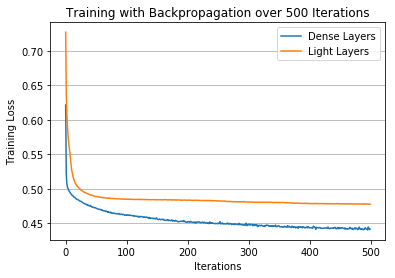

In [11]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(dense.history['loss'])
plt.plot(light.history['loss'])
plt.title('Training with Backpropagation over 500 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.legend(['Dense Layers','Light Layers'])
plt.grid(axis='y')

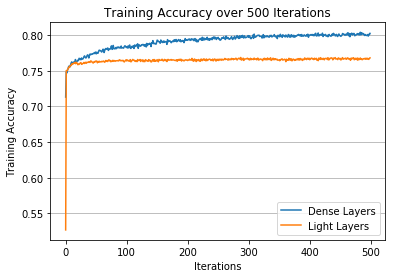

In [12]:
# accuracy should increase over epochs
plt.plot(dense.history['acc'])
plt.plot(light.history['acc'])
plt.title('Training Accuracy over 500 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.legend(['Dense Layers','Light Layers'])
plt.grid(axis='y')

In [ ]:
# Accuracy on light/dense model
def pred_count(heart_cvd):
    corr = 0
    wron = 0
    for index, row in heart_cvd.iterrows():
        if row['predicted'] == row['actual']:
            corr = corr + 1
        else:
            wron = wron + 1

    print(f'Correct predictions: {corr}')
    print(f'Incorrect predictions: {wron}')

predictions = model.predict_classes(X_test_scaled)
test_df = pd.DataFrame({'predicted':np.ravel(predictions),'actual':np.ravel(y_test)})
pred_count(test_df)

In [13]:
#Export to json
import json
with open('dense_cvd.json', 'w') as f:
    json.dump(dense.history, f)
with open('light_cvd.json', 'w') as f:
    json.dump(light.history, f)   

In [14]:
import json
with open('light_cvd.json', 'r') as f:
        history = json.load(f) 

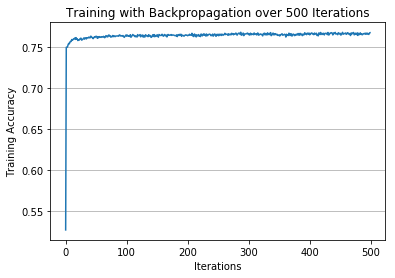

In [17]:
plt.plot(history['acc'])
plt.title('Training with Backpropagation over 500 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

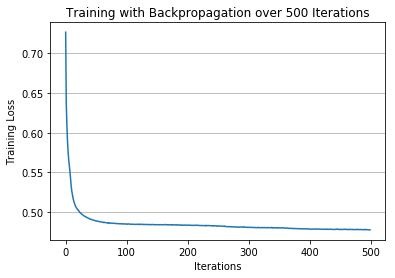

In [19]:
plt.plot(history['loss'])
plt.title('Training with Backpropagation over 500 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [20]:
# Save the light model as most accurate
light_model.save("framingham_cvd.h5")

# Loading a Model

In [21]:
import pandas as pd
# Load the model
from keras.models import load_model
cvd_model = load_model("framingham_cvd.h5")

## Evaluating the loaded model

In [22]:
#Load the light model
model_loss, model_accuracy = cvd_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.52350817922874, Accuracy: 0.7525773195876289


In [30]:
# create a sample "good" patient, not from data
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
pt = {'SEX':[0],'AGE':[33],'CIGPDAY':[0],'HEARTRTE':[65],'SYSBP':[120],
     'BPMEDS':[0],'TOTCHOL':[130],'BMI':[18],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[1.1]}
good_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(good_patient)

array([[1.]], dtype=float32)

In [24]:
print(f"Predicted class: {cvd_model.predict_classes(good_patient)}")

Predicted class: [[1]]


In [25]:
#% create a sample "bad" patient, not from data
pt = {'SEX':[1],'AGE':[75],'CIGPDAY':[5],'HEARTRTE':[68],'SYSBP':[180],
     'BPMEDS':[0],'TOTCHOL':[210],'BMI':[25],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[0]}
bad_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(bad_patient)

array([[1.]], dtype=float32)

In [26]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient)}")

Predicted class: [[1]]


In [27]:
# create a sample "bad" patient, not from data
pt2 = {'SEX':[1],'AGE':[75],'CIGPDAY':[5],'HEARTRTE':[68],'SYSBP':[180],
     'BPMEDS':[0],'TOTCHOL':[210],'BMI':[25],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[0]}
bad_patient2 = pd.DataFrame(pt2)

# return probability of response (cvd)
cvd_model.predict(bad_patient2)

array([[1.]], dtype=float32)

In [28]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient2)}")

Predicted class: [[1]]
